In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
x = np.linspace(0,50,501)

In [4]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [5]:
type(x)

numpy.ndarray

In [6]:
y = np.sin(x)

In [7]:
y

array([ 0.00000000e+00,  9.98334166e-02,  1.98669331e-01,  2.95520207e-01,
        3.89418342e-01,  4.79425539e-01,  5.64642473e-01,  6.44217687e-01,
        7.17356091e-01,  7.83326910e-01,  8.41470985e-01,  8.91207360e-01,
        9.32039086e-01,  9.63558185e-01,  9.85449730e-01,  9.97494987e-01,
        9.99573603e-01,  9.91664810e-01,  9.73847631e-01,  9.46300088e-01,
        9.09297427e-01,  8.63209367e-01,  8.08496404e-01,  7.45705212e-01,
        6.75463181e-01,  5.98472144e-01,  5.15501372e-01,  4.27379880e-01,
        3.34988150e-01,  2.39249329e-01,  1.41120008e-01,  4.15806624e-02,
       -5.83741434e-02, -1.57745694e-01, -2.55541102e-01, -3.50783228e-01,
       -4.42520443e-01, -5.29836141e-01, -6.11857891e-01, -6.87766159e-01,
       -7.56802495e-01, -8.18277111e-01, -8.71575772e-01, -9.16165937e-01,
       -9.51602074e-01, -9.77530118e-01, -9.93691004e-01, -9.99923258e-01,
       -9.96164609e-01, -9.82452613e-01, -9.58924275e-01, -9.25814682e-01,
       -8.83454656e-01, -

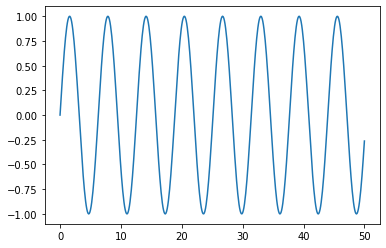

In [8]:
plt.plot(x,y)

In [9]:
df = pd.DataFrame(data=y, index=x, columns=['Sine'])

In [10]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [11]:
len(df)

501

In [12]:
test_percent = 0.1

In [13]:
len(df)*test_percent

50.1

In [14]:
test_point = np.round(len(df)*test_percent)

In [15]:
test_point

50.0

In [16]:
test_ind = int(len(df) - test_point)

In [17]:
test_ind

451

In [18]:
train = df.iloc[:test_ind]

In [19]:
test = df.iloc[test_ind:]

In [20]:
train

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
44.6,0.579164
44.7,0.657656
44.8,0.729577
44.9,0.794208


In [21]:
type(train)

pandas.core.frame.DataFrame

In [22]:
test

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


In [23]:
len(test)

50

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()

In [26]:
scaled_train = scaler.fit_transform(train)

In [27]:
scaled_test = scaler.transform(test)

In [28]:
scaled_train

array([[4.99999116e-01],
       [5.49916225e-01],
       [5.99334579e-01],
       [6.47760405e-01],
       [6.94709850e-01],
       [7.39713809e-01],
       [7.82322618e-01],
       [8.22110545e-01],
       [8.58680040e-01],
       [8.91665714e-01],
       [9.20737985e-01],
       [9.45606372e-01],
       [9.66022399e-01],
       [9.81782075e-01],
       [9.92727935e-01],
       [9.98750612e-01],
       [9.99789928e-01],
       [9.95835500e-01],
       [9.86926839e-01],
       [9.73152957e-01],
       [9.54651478e-01],
       [9.31607263e-01],
       [9.04250562e-01],
       [8.72854714e-01],
       [8.37733417e-01],
       [7.99237589e-01],
       [7.57751870e-01],
       [7.13690771e-01],
       [6.67494535e-01],
       [6.19624741e-01],
       [5.70559686e-01],
       [5.20789614e-01],
       [4.70811810e-01],
       [4.21125636e-01],
       [3.72227539e-01],
       [3.24606094e-01],
       [2.78737119e-01],
       [2.35078919e-01],
       [1.94067715e-01],
       [1.56113277e-01],


In [29]:
type(scaled_train)

numpy.ndarray

In [30]:
scaled_test

array([[9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],
       [7.50127132e-01],
       [7.05655314e-01],
       [6.59128649e-01],
       [6.11012013e-01],
       [5.61786173e-01],
       [5.11942978e-01],
       [4.61980443e-01],
       [4.12397778e-01],
       [3.63690397e-01],
       [3.16344967e-01],
       [2.70834550e-01],
       [2.27613868e-01],
       [1.87114770e-01],
       [1.49741909e-01],
       [1.15868702e-01],
       [8.58335998e-02],
       [5.99367021e-02],
       [3.84367625e-02],
       [2.15486014e-02],
       [9.44095974e-03],
       [2.23481297e-03],
       [2.16257798e-06],
       [2.76531647e-03],
       [1.04966661e-02],
       [2.31189624e-02],


In [31]:
type(scaled_test)

numpy.ndarray

In [32]:
# Bacth Generator

In [33]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [34]:
#help(TimeseriesGenerator)

In [35]:
length = 25
batch_size = 1

generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [36]:
len(scaled_train)

451

In [37]:
len(generator)

426

In [38]:
type(generator)

tensorflow.python.keras.preprocessing.sequence.TimeseriesGenerator

In [39]:
X,y = generator[0]

In [40]:
X

array([[[0.49999912],
        [0.54991622],
        [0.59933458],
        [0.64776041],
        [0.69470985],
        [0.73971381],
        [0.78232262],
        [0.82211054],
        [0.85868004],
        [0.89166571],
        [0.92073798],
        [0.94560637],
        [0.9660224 ],
        [0.98178208],
        [0.99272794],
        [0.99875061],
        [0.99978993],
        [0.9958355 ],
        [0.98692684],
        [0.97315296],
        [0.95465148],
        [0.93160726],
        [0.90425056],
        [0.87285471],
        [0.83773342]]])

In [41]:
type(scaled_test)

numpy.ndarray

In [42]:
y

array([[0.79923759]])

In [43]:
scaled_train

array([[4.99999116e-01],
       [5.49916225e-01],
       [5.99334579e-01],
       [6.47760405e-01],
       [6.94709850e-01],
       [7.39713809e-01],
       [7.82322618e-01],
       [8.22110545e-01],
       [8.58680040e-01],
       [8.91665714e-01],
       [9.20737985e-01],
       [9.45606372e-01],
       [9.66022399e-01],
       [9.81782075e-01],
       [9.92727935e-01],
       [9.98750612e-01],
       [9.99789928e-01],
       [9.95835500e-01],
       [9.86926839e-01],
       [9.73152957e-01],
       [9.54651478e-01],
       [9.31607263e-01],
       [9.04250562e-01],
       [8.72854714e-01],
       [8.37733417e-01],
       [7.99237589e-01],
       [7.57751870e-01],
       [7.13690771e-01],
       [6.67494535e-01],
       [6.19624741e-01],
       [5.70559686e-01],
       [5.20789614e-01],
       [4.70811810e-01],
       [4.21125636e-01],
       [3.72227539e-01],
       [3.24606094e-01],
       [2.78737119e-01],
       [2.35078919e-01],
       [1.94067715e-01],
       [1.56113277e-01],


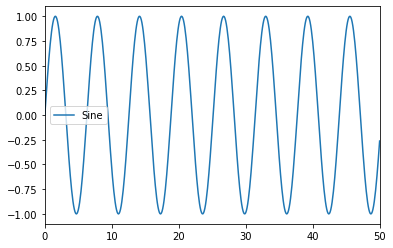

In [44]:
df.plot()

In [45]:
length = 50
batch_size = 1

generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [47]:
n_features = 1

In [48]:
model = Sequential()

model.add(SimpleRNN(50, input_shape=(length,n_features)))
model.add(Dense(1))

model.compile(optimizer='Adam', loss='mse')

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.fit_generator(generator,epochs=5)

Epoch 1/5


C:\Users\akumar5\AppData\Local\Anaconda\envs\mytfenv\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


401/401 [==============================] - 4s 7ms/step - loss: 0.0340
Epoch 2/5
401/401 [==============================] - 3s 6ms/step - loss: 2.2134e-04
Epoch 3/5
401/401 [==============================] - 3s 7ms/step - loss: 1.1373e-04
Epoch 4/5
401/401 [==============================] - 3s 8ms/step - loss: 1.2086e-04
Epoch 5/5
401/401 [==============================] - 2s 6ms/step - loss: 4.4657e-04


In [51]:
losses = pd.DataFrame(model.history.history)

In [52]:
losses

,loss
0,0.007788
1,0.000240
2,0.000139
3,0.000137
4,0.000346


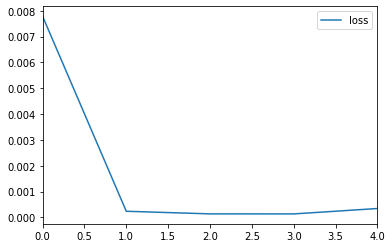

In [53]:
losses.plot()

In [54]:
scaled_test

array([[9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],
       [7.50127132e-01],
       [7.05655314e-01],
       [6.59128649e-01],
       [6.11012013e-01],
       [5.61786173e-01],
       [5.11942978e-01],
       [4.61980443e-01],
       [4.12397778e-01],
       [3.63690397e-01],
       [3.16344967e-01],
       [2.70834550e-01],
       [2.27613868e-01],
       [1.87114770e-01],
       [1.49741909e-01],
       [1.15868702e-01],
       [8.58335998e-02],
       [5.99367021e-02],
       [3.84367625e-02],
       [2.15486014e-02],
       [9.44095974e-03],
       [2.23481297e-03],
       [2.16257798e-06],
       [2.76531647e-03],
       [1.04966661e-02],
       [2.31189624e-02],


In [55]:
length = 50

In [56]:
first_eval_batch = scaled_train[-length:]

In [57]:
first_eval_batch

array([[8.37405820e-01],
       [7.98881698e-01],
       [7.57371240e-01],
       [7.13289205e-01],
       [6.67076045e-01],
       [6.19193508e-01],
       [5.70120021e-01],
       [5.20345908e-01],
       [4.70368497e-01],
       [4.20687145e-01],
       [3.71798252e-01],
       [3.24190300e-01],
       [2.78338972e-01],
       [2.34702398e-01],
       [1.93716581e-01],
       [1.55791039e-01],
       [1.21304709e-01],
       [9.06021693e-02],
       [6.39901882e-02],
       [4.17346643e-02],
       [2.40579672e-02],
       [1.11367167e-02],
       [3.10001778e-03],
       [2.81703720e-05],
       [1.95186738e-03],
       [8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],
       [5.08850150e-01],


In [58]:
type(first_eval_batch)

numpy.ndarray

In [59]:
first_eval_batch.shape

(50, 1)

In [60]:
first_eval_batch = first_eval_batch.reshape(1, length, n_features)

In [61]:
first_eval_batch.shape

(1, 50, 1)

In [62]:
model.predict(first_eval_batch)

array([[0.9470433]], dtype=float32)

In [63]:
scaled_test[0]

array([0.94955134])

In [64]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1, length, n_features)



In [65]:
first_eval_batch

array([[8.37405820e-01],
       [7.98881698e-01],
       [7.57371240e-01],
       [7.13289205e-01],
       [6.67076045e-01],
       [6.19193508e-01],
       [5.70120021e-01],
       [5.20345908e-01],
       [4.70368497e-01],
       [4.20687145e-01],
       [3.71798252e-01],
       [3.24190300e-01],
       [2.78338972e-01],
       [2.34702398e-01],
       [1.93716581e-01],
       [1.55791039e-01],
       [1.21304709e-01],
       [9.06021693e-02],
       [6.39901882e-02],
       [4.17346643e-02],
       [2.40579672e-02],
       [1.11367167e-02],
       [3.10001778e-03],
       [2.81703720e-05],
       [1.95186738e-03],
       [8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],
       [5.08850150e-01],


In [66]:
current_batch

array([[[8.37405820e-01],
        [7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.5

In [67]:
predicted_value = [[[99]]]
np.append(current_batch[:,1:,:],[[[99]]],axis=1)

array([[[7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.58896644e-01],
        [5.0

In [68]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1, length, n_features)

for i in range(len(test)):
    
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [69]:
test_predictions

[array([0.9470433], dtype=float32),
 array([0.96605885], dtype=float32),
 array([0.97929376], dtype=float32),
 array([0.9873338], dtype=float32),
 array([0.99074996], dtype=float32),
 array([0.98872083], dtype=float32),
 array([0.9819462], dtype=float32),
 array([0.9704631], dtype=float32),
 array([0.9540362], dtype=float32),
 array([0.9337209], dtype=float32),
 array([0.9093902], dtype=float32),
 array([0.88160026], dtype=float32),
 array([0.8498202], dtype=float32),
 array([0.81570756], dtype=float32),
 array([0.77864134], dtype=float32),
 array([0.73914206], dtype=float32),
 array([0.69798], dtype=float32),
 array([0.6551447], dtype=float32),
 array([0.6109992], dtype=float32),
 array([0.56612575], dtype=float32),
 array([0.5205733], dtype=float32),
 array([0.47496316], dtype=float32),
 array([0.42948434], dtype=float32),
 array([0.38465884], dtype=float32),
 array([0.34079155], dtype=float32),
 array([0.2984992], dtype=float32),
 array([0.25812185], dtype=float32),
 array([0.219905

In [70]:
scaled_test

array([[9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],
       [7.50127132e-01],
       [7.05655314e-01],
       [6.59128649e-01],
       [6.11012013e-01],
       [5.61786173e-01],
       [5.11942978e-01],
       [4.61980443e-01],
       [4.12397778e-01],
       [3.63690397e-01],
       [3.16344967e-01],
       [2.70834550e-01],
       [2.27613868e-01],
       [1.87114770e-01],
       [1.49741909e-01],
       [1.15868702e-01],
       [8.58335998e-02],
       [5.99367021e-02],
       [3.84367625e-02],
       [2.15486014e-02],
       [9.44095974e-03],
       [2.23481297e-03],
       [2.16257798e-06],
       [2.76531647e-03],
       [1.04966661e-02],
       [2.31189624e-02],


In [71]:
true_predictions = scaler.inverse_transform(test_predictions)

In [72]:
type(true_predictions)

numpy.ndarray

In [73]:
true_predictions

array([[ 0.89408119],
       [ 0.93211199],
       [ 0.9585816 ],
       [ 0.9746615 ],
       [ 0.9814938 ],
       [ 0.97743559],
       [ 0.96388637],
       [ 0.94092041],
       [ 0.90806683],
       [ 0.86743658],
       [ 0.81877562],
       [ 0.76319616],
       [ 0.69963655],
       [ 0.63141183],
       [ 0.55727998],
       [ 0.47828205],
       [ 0.39595856],
       [ 0.31028866],
       [ 0.22199844],
       [ 0.13225221],
       [ 0.04114807],
       [-0.05007151],
       [-0.14102842],
       [-0.23067869],
       [-0.31841257],
       [-0.4029966 ],
       [-0.48375065],
       [-0.56018316],
       [-0.63055577],
       [-0.69383186],
       [-0.75044979],
       [-0.79796111],
       [-0.83640572],
       [-0.86504834],
       [-0.88350645],
       [-0.89140985],
       [-0.88845524],
       [-0.87516494],
       [-0.85139349],
       [-0.81819494],
       [-0.77588556],
       [-0.7243179 ],
       [-0.66632385],
       [-0.60093635],
       [-0.52963191],
       [-0

In [74]:
test['Predictions'] = true_predictions

C:\Users\akumar5\AppData\Local\Anaconda\envs\mytfenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
test

,Sine,Predictions
45.1,0.899097,0.894081
45.2,0.938307,0.932112
45.3,0.968142,0.958582
45.4,0.988304,0.974661
45.5,0.998591,0.981494
45.6,0.998900,0.977436
45.7,0.989229,0.963886
45.8,0.969673,0.940920
45.9,0.940429,0.908067
46.0,0.901788,0.867437


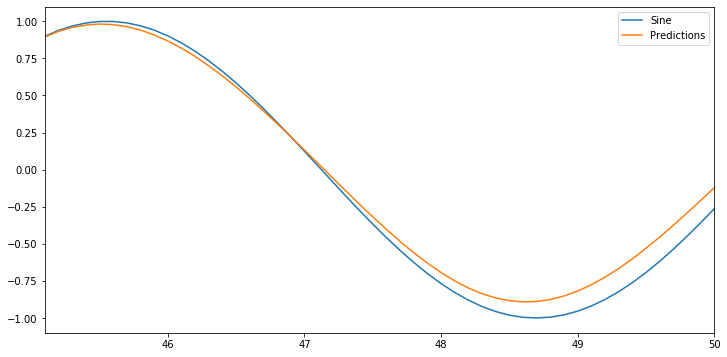

In [76]:
# plt.figure(figsize=(12,6))
test.plot(figsize=(12,6))

In [77]:
# LSTM and EarlyStopping

In [78]:
from tensorflow.keras.callbacks import EarlyStopping

In [79]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [80]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [81]:
length = 49

generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=1)

In [82]:
model = Sequential()

model.add(LSTM(50, input_shape=(length,n_features)))
model.add(Dense(1))

model.compile(optimizer='Adam', loss='mse')

In [83]:
model.fit_generator(generator, epochs=20, validation_data=validation_generator, callbacks=early_stop)

C:\Users\akumar5\AppData\Local\Anaconda\envs\mytfenv\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
402/402 [==============================] - 9s 18ms/step - loss: 0.0484 - val_loss: 2.5236e-05
Epoch 2/20
402/402 [==============================] - 5s 12ms/step - loss: 3.0978e-04 - val_loss: 2.2599e-05
Epoch 3/20
402/402 [==============================] - 5s 14ms/step - loss: 4.3305e-04 - val_loss: 7.8383e-05
Epoch 4/20
402/402 [==============================] - 7s 16ms/step - loss: 1.3987e-04 - val_loss: 9.3982e-06
Epoch 5/20
402/402 [==============================] - 6s 14ms/step - loss: 3.6436e-04 - val_loss: 6.2354e-05
Epoch 6/20
402/402 [==============================] - 5s 13ms/step - loss: 1.3868e-04 - val_loss: 7.2585e-06
Epoch 7/20
402/402 [==============================] - 6s 16ms/step - loss: 1.6921e-04 - val_loss: 1.9204e-04
Epoch 8/20
402/402 [==============================] - 6s 15ms/step - loss: 5.0042e-05 - val_loss: 5.9577e-05


In [84]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1, length, n_features)

for i in range(len(test)):
    
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

C:\Users\akumar5\AppData\Local\Anaconda\envs\mytfenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


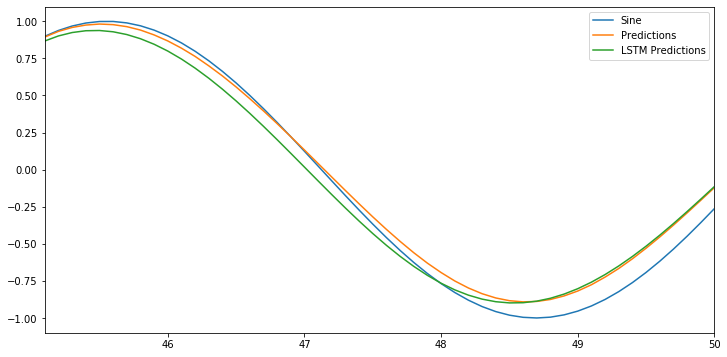

In [85]:
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM Predictions'] = true_predictions
test.plot(figsize=(12,6))

In [86]:
full_scaler = MinMaxScaler()

In [87]:
scaled_full_data = full_scaler.fit_transform(df)

In [88]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [89]:
model = Sequential()

model.add(LSTM(50, input_shape=(length,n_features)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [90]:
model.fit_generator(generator, epochs=6)

C:\Users\akumar5\AppData\Local\Anaconda\envs\mytfenv\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/6
452/452 [==============================] - 9s 16ms/step - loss: 0.0271
Epoch 2/6
452/452 [==============================] - 6s 14ms/step - loss: 8.3003e-05
Epoch 3/6
452/452 [==============================] - 8s 18ms/step - loss: 1.9965e-04
Epoch 4/6
452/452 [==============================] - 8s 17ms/step - loss: 2.0425e-04: 2s - loss - ET
Epoch 5/6
452/452 [==============================] - 7s 16ms/step - loss: 3.0942e-04
Epoch 6/6
452/452 [==============================] - 6s 14ms/step - loss: 1.1228e-04


In [91]:
forecast = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1, length, n_features)

for i in range(25):
    
    current_pred = model.predict(current_batch)[0]
    
    forecast.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [92]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [93]:
forecast = scaler.inverse_transform(forecast)

In [94]:
forecast

array([[ 0.95149896],
       [ 0.99724265],
       [ 1.03403321],
       [ 1.06182973],
       [ 1.08023359],
       [ 1.08899945],
       [ 1.08803649],
       [ 1.07738689],
       [ 1.05720921],
       [ 1.02775546],
       [ 0.98935917],
       [ 0.94242112],
       [ 0.88739945],
       [ 0.8248041 ],
       [ 0.75519013],
       [ 0.67915644],
       [ 0.59734388],
       [ 0.51043361],
       [ 0.41914959],
       [ 0.32425404],
       [ 0.22655053],
       [ 0.12687603],
       [ 0.02610315],
       [-0.07486953],
       [-0.17511921]])

In [95]:
forecast_index = np.arange(50.1,52.6,step=0.1)

In [96]:
len(forecast_index)

25

In [97]:
len(forecast)

25

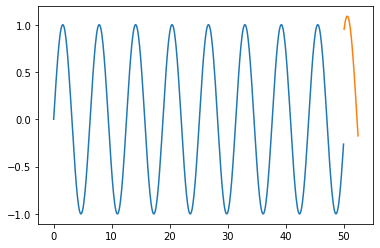

In [98]:
plt.plot(df.index,df['Sine'])
plt.plot(forecast_index, forecast)